In [6]:
import numpy as np
from runme import reproduce_pantheon_constraints, plot_markov_chain, histogram_H0

# Group 2: Results and Plots

## Reproducing the Pantheon Constraints

Calling the function `reproduce_pantheon_constraints` will produce a scatter plot of two elements of the Markov chain living in `adam/chain.pickle`. These two elements are omega_lambda and omega_m--we suppress knowledge of H0, the Hubble constant, here.

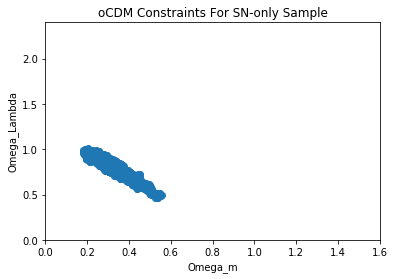

In [3]:
my_chain = reproduce_pantheon_constraints()

Notably, this distribution doesn't quite match that of the paper. However, the distribution does seem to be well-contained, in the sense that $\Omega_\lambda$ and $\Omega_m$ seem to have converged. We can examine the trace plot to see this:

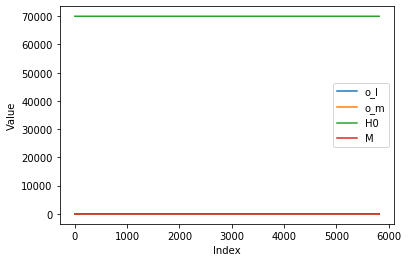

In [5]:
plot_markov_chain(my_chain)

(There doesn't seem to be a way to make this plot zoomable in Jupyter Notebook--feel free to call this function in `runme.py` to see for yourself!)

## Reproducing the Pantheon Constraints, round 2: Not including systematic errors

In [9]:
#?????????????????
#This is where I'd put my second round of Pantheon Constraint plotting, this time with the systematic error toggle changed.

## Plotting a distribution of the Hubble Constant, $H_0$

Similarly, we can plot the component of the Markov chain corresponding to the Hubble constant, this time as a discretized distribution (histogram):

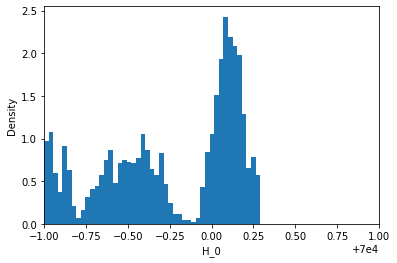

In [8]:
histogram_H0(my_chain)